# Unit 5 - Financial Planning


In [1]:
#initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [17]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18713700,
            "total_supply": 18713700,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35532.0,
                    "volume_24h": 87697454230,
                    "market_cap": 664926408483,
                    "percentage_change_1h": 1.01426526307882,
                    "percentage_change_24h": -5.30871783558448,
                    "percentage_change_7d": -23.7276335475747,
                    "percent_change_1h": 1.01426526307882,
                    "percent_change_24h": -5.30871783558448,
                    "percent_change_7d": -23.7276335475747
                },
                "CAD": {
                    "price": 42897.7836,
                    "volume_24h": 105877136491.879,
                    "

In [18]:
# Fetch BTC price
btc_resp = requests.get(btc_url)
btc_json = btc_resp.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']

# Fetch ETH price
eth_resp = requests.get(eth_url)
eth_json = eth_resp.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42638.40
The current value of your 5.3 ETH is $11546.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [20]:
#Set Alpaca API and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [25]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-20", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Drop the time component of the date
#df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()

AGG                                    SPY  \
                             open   high     low   close   volume   open   
time                                                                       
2021-05-20 00:00:00-04:00  114.08  114.3  114.08  114.29  5647134  411.8   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-20 00:00:00-04:00  416.625  411.67  415.24  69427475

In [26]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.29
Current SPY closing price: $415.24


In [27]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22858.00


### Savings Health Analysis

In [28]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# print the data 
df_savings

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,54185.086
shares,43620.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

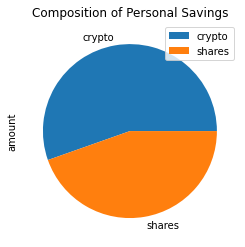

In [29]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2021-05-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-21', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                         SPY           \
              open      high     low    close   volume    open     high   
2021-05-17  114.21  115.4999  111.26  114.165  3852318  415.39  416.390   
2021-05-18  114.11  114.1100  114.03  114.070  3499293  415.80  416.060   
2021-05-19  114.62  114.6200  113.79  113.920  6576312  406.92  411.050   
2021-05-20  114.08  114.3000  114.08  114.290  5647134  411.80  416.625   
2021-05-21  114.36  114.4000  114.23  114.320  3350907  416.87  418.200   

                                       
                low   close    volume  
2021-05-17  413.360  415.55  57714535  
2021-05-18  411.770  411.99  52318865  
2021-05-19  405.335  410.90  94165741  
2021-05-20  411.670  415.24  69426295  
2021-05-21  414.450  414.95  66392970

In [39]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [41]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                      SPY  \
              open      high     low    close   volume daily_return    open   
2021-05-17  114.21  115.4999  111.26  114.165  3852318          NaN  415.39   
2021-05-18  114.11  114.1100  114.03  114.070  3499293    -0.000832  415.80   
2021-05-19  114.62  114.6200  113.79  113.920  6576312    -0.001315  406.92   
2021-05-20  114.08  114.3000  114.08  114.290  5647134     0.003248  411.80   
2021-05-21  114.36  114.4000  114.23  114.320  3350907     0.000262  416.87   

                                                             
               high      low   close    volume daily_return  
2021-05-17  416.390  413.360  415.55  57714535          NaN  
2021-05-18  416.060  411.770  411.99  52318865    -0.008567  
2021-05-19  411.050  405.335  410.90  94165741    -0.002646  
2021-05-20  416.625  411.670  415.24  69426295     0.010562  
2021-05-21  418.200  414.450  414.95  66392970    -0.000698

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004076,0.998525,0.998910,0.999694,0.992166,0.993696,0.994591,0.994827,1.000292,0.998747,...,1.004292,1.004841,1.006522,0.999821,1.001870,0.998763,0.995887,0.996609,1.001050,1.001214
2,0.996817,0.997217,1.005500,0.995768,1.000719,0.996345,0.991092,0.989667,1.003807,1.000818,...,0.997806,1.003469,1.009740,1.002405,0.998594,0.999001,1.001032,0.998327,1.000305,1.003011
3,1.000630,1.001917,1.005167,0.992843,0.990942,0.994866,0.987237,0.988819,0.993776,1.001664,...,1.009913,1.000960,1.008281,1.007625,1.000133,1.003019,0.999633,0.994299,0.988805,1.000098
4,0.999198,1.004895,1.006887,0.994030,0.999406,1.001728,0.987318,0.991441,0.996158,1.008881,...,1.005988,0.996539,1.007653,1.000871,0.999583,1.003091,1.003605,0.995055,0.993352,1.001126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.538920,0.443575,0.387819,0.932786,0.612580,0.619071,0.595318,0.347907,0.502358,0.490611,...,0.435341,0.502754,0.887459,0.612400,0.208811,0.310104,0.710707,0.197027,0.257577,0.485017
7557,0.534745,0.442140,0.389048,0.937330,0.612421,0.615842,0.597256,0.350242,0.502775,0.487734,...,0.434763,0.503777,0.884052,0.615854,0.208995,0.310996,0.708009,0.197547,0.258029,0.482652
7558,0.535298,0.437803,0.388287,0.939454,0.613225,0.618750,0.599010,0.349271,0.503660,0.490975,...,0.432747,0.505706,0.878048,0.612621,0.210423,0.310718,0.708511,0.197200,0.257079,0.479956
7559,0.537829,0.434158,0.387828,0.936354,0.610110,0.621799,0.598755,0.347915,0.503066,0.490696,...,0.433719,0.504791,0.877954,0.612558,0.209316,0.312200,0.705127,0.197403,0.255950,0.478121


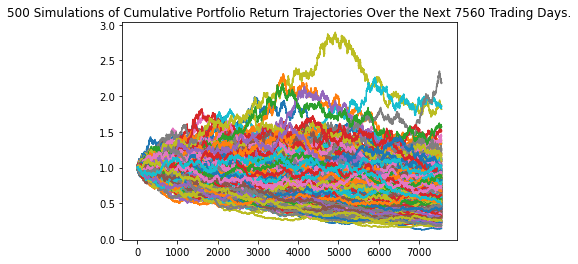

In [45]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

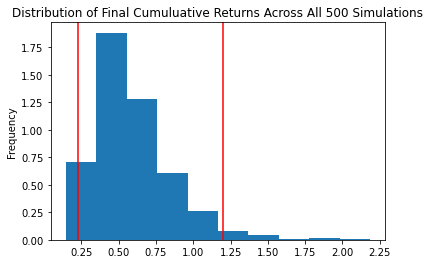

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean              0.594084
std               0.264654
min               0.145083
25%               0.409909
50%               0.535873
75%               0.721518
max               2.185690
95% CI Lower      0.230064
95% CI Upper      1.195913
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $4601.28 and $23918.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $6901.93 and $35877.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                      SPY  \
              open      high     low    close   volume daily_return    open   
2021-05-17  114.21  115.4999  111.26  114.165  3852318          NaN  415.39   
2021-05-18  114.11  114.1100  114.03  114.070  3499293    -0.000832  415.80   
2021-05-19  114.62  114.6200  113.79  113.920  6576312    -0.001315  406.92   
2021-05-20  114.08  114.3000  114.08  114.290  5647134     0.003248  411.80   
2021-05-21  114.36  114.4000  114.23  114.320  3350907     0.000262  416.87   

                                                             
               high      low   close    volume daily_return  
2021-05-17  416.390  413.360  415.55  57714535          NaN  
2021-05-18  416.060  411.770  411.99  52318865    -0.008567  
2021-05-19  411.050  405.335  410.90  94165741    -0.002646  
2021-05-20  416.625  411.670  415.24  69426295     0.010562  
2021-05-21  418.200  414.450  414.95  66392970    -0.000698

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")